# DS-SF-27 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [62]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [63]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [64]:
df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 rows and 4 columns

> ### Question 2.  Create a summary table.

In [65]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [66]:
df.gre.var()

13369.953039758006

In [67]:
df.gpa.var()

0.14487948622204228

Answer:because the range of GPA is much smaller than the range of GRE. The variances are displayed below

> ### Question 4.  Drop data points with missing data.

In [68]:
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [69]:
df.dropna(axis = 'index', subset = ['gre', 'gpa', 'prestige'], inplace=True)

In [70]:
df.shape[0]

397

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [71]:
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer:Because there are no longer any null values in the data set when I run df.isnull().sum()

In [72]:
df.shape[0]

397

> ### Question 6.  Create boxplots for `gre` and `gpa`.

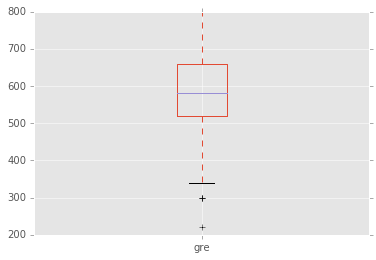

In [73]:
df.gre.plot(kind = 'box')

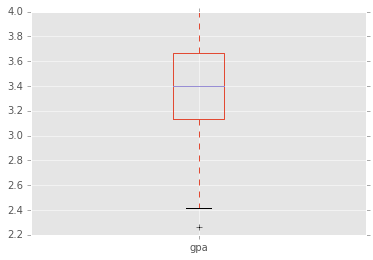

In [74]:
df.gpa.plot(kind = 'box')

> ### Question 7.  What do boxplots show?

Answer: It gives an overview of the parameter. It shows the median (blue line inside the box), the IQR (the bottom and top of the box), the min and the max. Finally, outliers are shown outside of the min/max (IQR * 1.5).

> ### Question 8.  Plot the distribution of each variable.

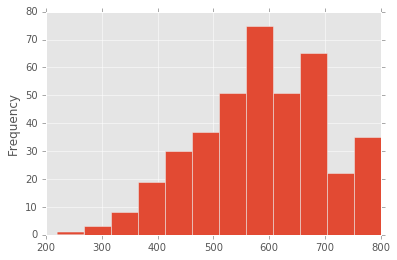

In [75]:
# TODO
df.gre.plot(kind = 'hist', bins = 12)

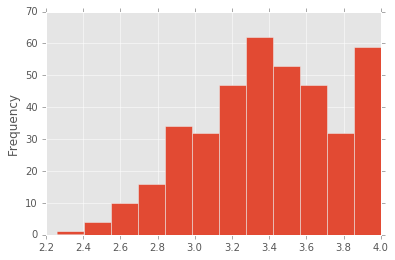

In [76]:
df.gpa.plot(kind = 'hist', bins = 12)

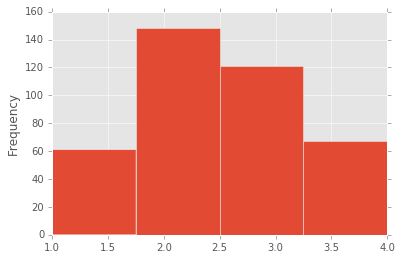

In [77]:
df.prestige.plot(kind = 'hist', bins = 4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f9f0bd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12011e910>]], dtype=object)

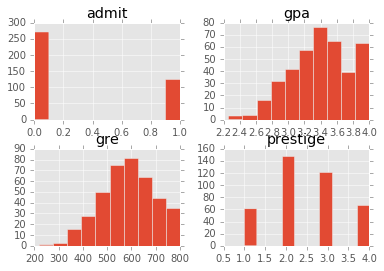

In [78]:
df.hist()

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

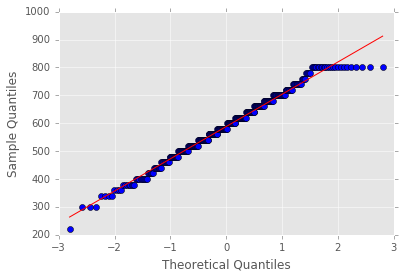

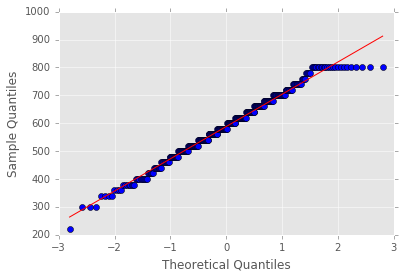

In [79]:
# TODO 
sm.qqplot(df.gre, line = 's')

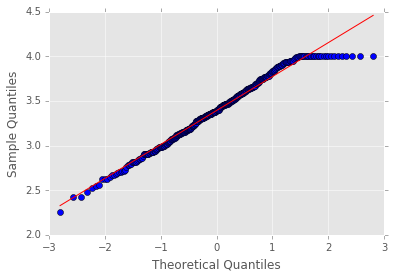

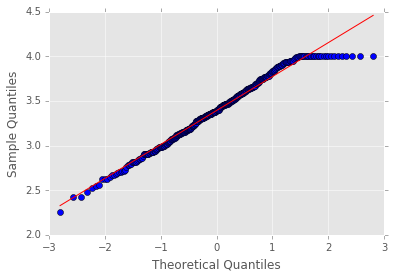

In [80]:
sm.qqplot(df.gpa, line = 's')

Answer:i think they're both slightly skewed to the left which makes sense since the mean is closer to the top limiting value. they both have a ceiling and the mean is closer to the ceiling than the floor. 

> ### Question 10.  Create a correlation matrix for the dataset

In [81]:
# TODO
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


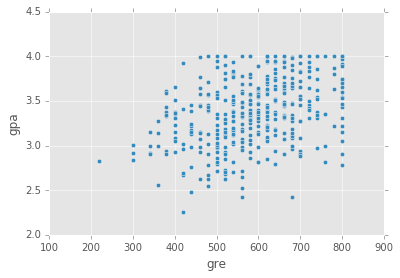

In [82]:
df.plot(kind = 'scatter', x = 'gre', y = 'gpa')

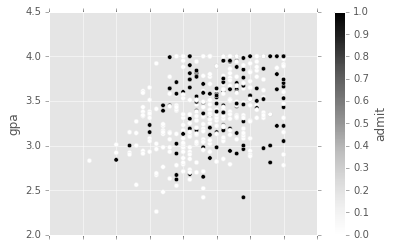

In [83]:
df.plot(kind = 'scatter', x = 'gre', y = 'gpa', c = 'admit')

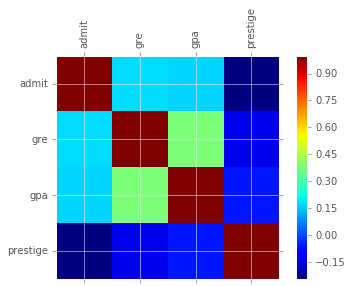

In [84]:
corr = df.corr()
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(corr))
subplot.set_xticklabels([None] + list(corr.columns), rotation = 90)
subplot.set_yticklabels([None] + list(corr.columns))

> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: there is an association between gre and gpa, and a weaker association between gre/gpa and admission status. prestige is not correlated with any of hte other factors.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: I would run a corr for the prestige/admission first, and a scatterplot. I would also divide the data set into the admitted and non-admitted applicants, and then compare the prestige levels between those two groups through a box plot and a histogram. If there were a relationship between prestige and admission, I think it would show up through one or more of those approaches.

In [85]:
admitted = df[df.admit == 1]

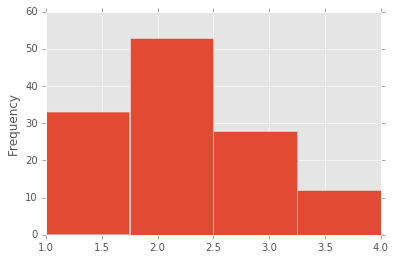

In [86]:
admitted.prestige.plot(kind = 'hist', bins = 4)

In [87]:
na = df[df.admit == 0]

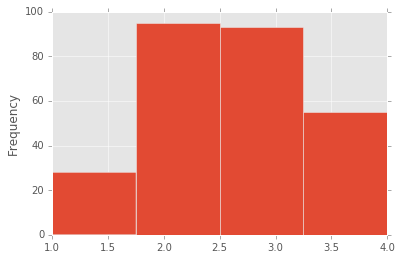

In [88]:
na.prestige.plot(kind = 'hist', bins = 4)

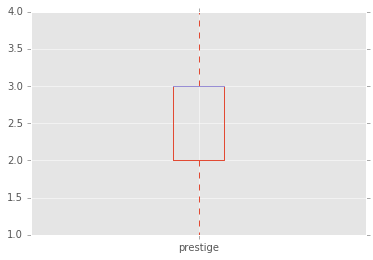

In [89]:
na.prestige.plot(kind = 'box')

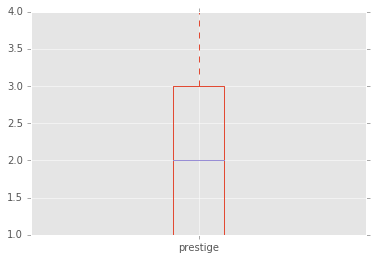

In [90]:
admitted.prestige.plot(kind = 'box')

> ### Question 13.  What is your hypothesis?

Answer: based on what I did above, I hypothesize that there is no or negative correlation between prestige and admit. 